### Loding Packages 

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score
import warnings 
warnings.simplefilter(action="ignore", category = FutureWarning)
warnings.simplefilter(action="ignore",category = UserWarning)

### Loading Data

In [2]:
data = pd.read_csv('churn_prediction.csv')

### Missing Values 

In [3]:
data.isna().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

#### Gender  

In [4]:
data['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

In [5]:
dict_gender = {'Male': 1, 'Female': 0}
data.replace({'gender': dict_gender}, inplace = True)
data.gender = data['gender'].fillna(-1)
data.gender.head()

0    1.0
1    1.0
2    1.0
3   -1.0
4    1.0
Name: gender, dtype: float64

#### Dependents , Occupation and City 

In [6]:
data['dependents'].value_counts()

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
9.0         1
52.0        1
36.0        1
50.0        1
8.0         1
25.0        1
32.0        1
Name: dependents, dtype: int64

In [7]:
data['occupation'].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [8]:
data['dependents'] = data['dependents'].fillna(0)
data['occupation'] = data['occupation'].fillna('self_employed')

In [9]:
data['city'] = data['city'].fillna(1020)

#### Days since last transaction

In [10]:
data['days_since_last_transaction'] = data['days_since_last_transaction'].fillna(999)

### Data Preprocessing

In [11]:
data = pd.concat([data,pd.get_dummies(data['occupation'],prefix = str('occupation'),prefix_sep = '_')],axis=1)
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,1.0,0.0,self_employed,187.0,2,755,224.0,...,0.20,0.20,1458.71,1458.71,0,0,0,0,1,0
1,2,310,35,1.0,0.0,self_employed,1020.0,2,3214,60.0,...,5486.27,100.56,6496.78,8787.61,0,0,0,0,1,0
2,4,2356,31,1.0,0.0,salaried,146.0,2,41,999.0,...,6046.73,259.23,5006.28,5070.14,0,0,0,1,0,0
3,5,478,90,-1.0,0.0,self_employed,1020.0,2,582,147.0,...,0.47,2143.33,2291.91,1669.79,1,0,0,0,1,0
4,6,2531,42,1.0,2.0,self_employed,1494.0,3,388,58.0,...,588.62,1538.06,1157.15,1677.16,1,0,0,0,1,0


In [12]:
num_cols = ['customer_nw_category', 'current_balance',
            'previous_month_end_balance', 'average_monthly_balance_prevQ2', 'average_monthly_balance_prevQ',
            'current_month_credit','previous_month_credit', 'current_month_debit', 
            'previous_month_debit','current_month_balance', 'previous_month_balance']
for i in num_cols:
    data[i] = np.log(data[i] + 17000)
    
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,1.0,0.0,self_employed,187.0,9.741086,755,224.0,...,9.740980,9.740980,9.823292,9.823292,0,0,0,0,1,0
1,2,310,35,1.0,0.0,self_employed,1020.0,9.741086,3214,60.0,...,10.020660,9.746866,10.064619,10.157649,0,0,0,0,1,0
2,4,2356,31,1.0,0.0,salaried,146.0,9.741086,41,999.0,...,10.045279,9.756102,9.999083,10.001981,0,0,0,1,0,0
3,5,478,90,-1.0,0.0,self_employed,1020.0,9.741086,582,147.0,...,9.740996,9.859710,9.867441,9.834662,1,0,0,0,1,0
4,6,2531,42,1.0,2.0,self_employed,1494.0,9.741145,388,58.0,...,9.775007,9.827581,9.806820,9.835057,1,0,0,0,1,0


In [13]:
scaler = StandardScaler()
scaled = scaler.fit_transform(data[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)
scaled.head(2)

,customer_nw_category,current_balance,previous_month_end_balance,average_monthly_balance_prevQ2,average_monthly_balance_prevQ,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
0,-0.34147,-0.613738,-0.632367,-0.630646,-0.697612,-0.313931,-0.324487,-0.368251,-0.377390,-0.653455,-0.666207
1,-0.34147,0.011267,0.446458,0.949414,0.317595,-0.313852,-0.324410,0.640986,-0.355677,0.149440,0.455680


In [14]:
data_original = data.copy()
data_original.head(2)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,1.0,0.0,self_employed,187.0,9.741086,755,224.0,...,9.74098,9.740980,9.823292,9.823292,0,0,0,0,1,0
1,2,310,35,1.0,0.0,self_employed,1020.0,9.741086,3214,60.0,...,10.02066,9.746866,10.064619,10.157649,0,0,0,0,1,0


In [15]:
data = data.drop(columns = num_cols, axis = 1)
data.head(2)

,customer_id,vintage,age,gender,dependents,occupation,city,branch_code,days_since_last_transaction,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,1.0,0.0,self_employed,187.0,755,224.0,0,0,0,0,1,0
1,2,310,35,1.0,0.0,self_employed,1020.0,3214,60.0,0,0,0,0,1,0


In [16]:
data = data.merge(scaled,left_index=True, right_index=True, how="left")
data.head(2)

,customer_id,vintage,age,gender,dependents,occupation,city,branch_code,days_since_last_transaction,churn,...,current_balance,previous_month_end_balance,average_monthly_balance_prevQ2,average_monthly_balance_prevQ,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
0,1,3135,66,1.0,0.0,self_employed,187.0,755,224.0,0,...,-0.613738,-0.632367,-0.630646,-0.697612,-0.313931,-0.324487,-0.368251,-0.377390,-0.653455,-0.666207
1,2,310,35,1.0,0.0,self_employed,1020.0,3214,60.0,0,...,0.011267,0.446458,0.949414,0.317595,-0.313852,-0.324410,0.640986,-0.355677,0.149440,0.455680


In [17]:
y_all = data['churn']
data = data.drop(['churn','customer_id','occupation'], axis=1)
data.head(2)

,vintage,age,gender,dependents,city,branch_code,days_since_last_transaction,occupation_company,occupation_retired,occupation_salaried,...,current_balance,previous_month_end_balance,average_monthly_balance_prevQ2,average_monthly_balance_prevQ,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
0,3135,66,1.0,0.0,187.0,755,224.0,0,0,0,...,-0.613738,-0.632367,-0.630646,-0.697612,-0.313931,-0.324487,-0.368251,-0.377390,-0.653455,-0.666207
1,310,35,1.0,0.0,1020.0,3214,60.0,0,0,0,...,0.011267,0.446458,0.949414,0.317595,-0.313852,-0.324410,0.640986,-0.355677,0.149440,0.455680


### Model Building and Evaluation Metrics  

In [19]:
baseline_cols = ['current_month_debit', 'previous_month_debit','current_balance','previous_month_end_balance','vintage'
                 ,'occupation_retired', 'occupation_salaried','occupation_self_employed', 'occupation_student']

In [20]:
baseline_data = data[baseline_cols]
baseline_data.head(2)

,current_month_debit,previous_month_debit,current_balance,previous_month_end_balance,vintage,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,-0.368251,-0.377390,-0.613738,-0.632367,3135,0,0,1,0
1,0.640986,-0.355677,0.011267,0.446458,310,0,0,1,0


### Train Test Split to create training, testing and validation set 

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(baseline_data,y_all,test_size=1/3,random_state=11, stratify = y_all)

In [27]:
model = LogisticRegression()
model.fit(xtrain,ytrain)
pred = model.predict_proba(xtest)
pred = pred[:,1]

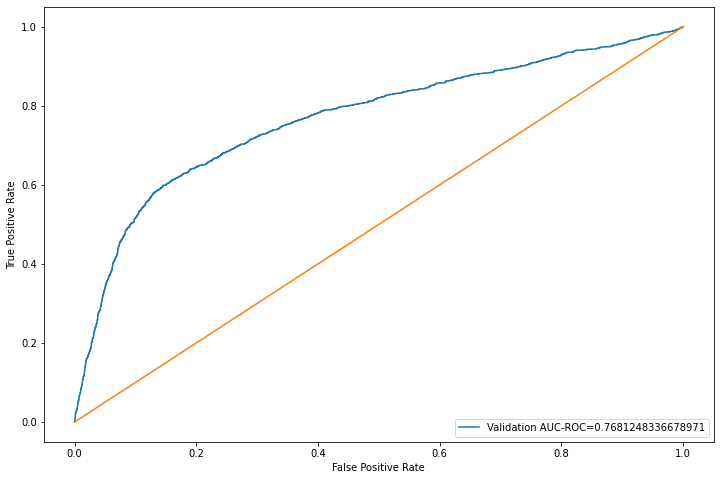

In [28]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest,pred) 
auc = roc_auc_score(ytest, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [29]:
pred_val = model.predict(xtest)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

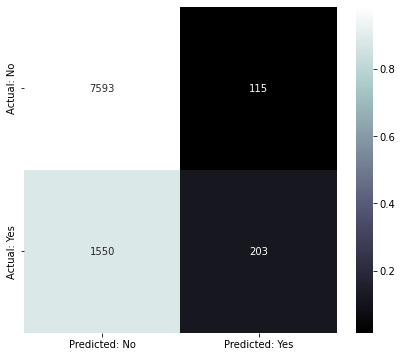

In [31]:
cm = confusion_matrix(ytest,pred_val)
def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=['Predicted: No','Predicted: Yes'], yticklabels=['Actual: No','Actual: Yes'], cmap=cmap)

plot_confusion_matrix(cm, ['No', 'Yes'])

In [32]:
recall_score(ytest,pred_val)

0.11580148317170565

In [36]:
def cv_score(ml_model, rstate = 12, thres = 0.5, cols = data.columns):
    i = 1
    cv_scores = []
    df1 = data.copy()
    df1 = data[cols]
    
    # 5 Fold cross validation stratified on the basis of target
    kf = StratifiedKFold(n_splits=5,random_state=rstate,shuffle=True)
    for df_index,test_index in kf.split(df1,y_all):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        xtr,xvl = df1.loc[df_index],df1.loc[test_index]
        ytr,yvl = y_all.loc[df_index],y_all.loc[test_index]
            
        # Define model for fitting on the training set for each fold
        model = ml_model
        model.fit(xtr, ytr)
        pred_probs = model.predict_proba(xvl)
        pp = []
         
        # Use threshold to define the classes based on probability values
        for j in pred_probs[:,1]:
            if j>thres:
                pp.append(1)
            else:
                pp.append(0)
         
        # Calculate scores for each fold and print
        pred_val = pp
        roc_score = roc_auc_score(yvl,pred_probs[:,1])
        recall = recall_score(yvl,pred_val)
        precision = precision_score(yvl,pred_val)
        sufix = ""
        msg = ""
        msg += "ROC AUC Score: {}, Recall Score: {:.4f}, Precision Score: {:.4f} ".format(roc_score, recall,precision)
        print("{}".format(msg))
         
         # Save scores
        cv_scores.append(roc_score)
        i+=1
    return cv_scores

In [37]:
baseline_scores = cv_score(LogisticRegression(), cols = baseline_cols)


1 of kfold 5
ROC AUC Score: 0.7644836090843695, Recall Score: 0.0751, Precision Score: 0.5766 

2 of kfold 5
ROC AUC Score: 0.778245401294831, Recall Score: 0.0751, Precision Score: 0.6695 

3 of kfold 5
ROC AUC Score: 0.7551777714552608, Recall Score: 0.1359, Precision Score: 0.6441 

4 of kfold 5
ROC AUC Score: 0.7582075088478692, Recall Score: 0.1169, Precision Score: 0.6508 

5 of kfold 5
ROC AUC Score: 0.7622346872656465, Recall Score: 0.1112, Precision Score: 0.5821 


In [38]:
all_feat_scores = cv_score(LogisticRegression())


1 of kfold 5
ROC AUC Score: 0.7332623574144488, Recall Score: 0.1103, Precision Score: 0.5088 

2 of kfold 5
ROC AUC Score: 0.768128660980372, Recall Score: 0.1977, Precision Score: 0.6820 

3 of kfold 5
ROC AUC Score: 0.7392380389306248, Recall Score: 0.1683, Precision Score: 0.5728 

4 of kfold 5
ROC AUC Score: 0.7298710973989238, Recall Score: 0.1112, Precision Score: 0.6257 

5 of kfold 5
ROC AUC Score: 0.7589997878484878, Recall Score: 0.1749, Precision Score: 0.6013 


In [40]:
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Create the RFE object and rank each feature
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=1, step=1)
rfe.fit(data, y_all)

RFE(estimator=LogisticRegression(), n_features_to_select=1)

In [42]:
ranking_df = pd.DataFrame()
ranking_df['Feature_name'] = data.columns
ranking_df['Rank'] = rfe.ranking_

In [43]:
ranked = ranking_df.sort_values(by=['Rank'])

In [44]:
ranked

,Feature_name,Rank
13,current_balance,1
16,average_monthly_balance_prevQ,2
7,occupation_company,3
15,average_monthly_balance_prevQ2,4
21,current_month_balance,5
22,previous_month_balance,6
19,current_month_debit,7
10,occupation_self_employed,8
9,occupation_salaried,9
11,occupation_student,10


In [45]:
rfe_top_10_scores = cv_score(LogisticRegression(), cols = ranked['Feature_name'][:10].values)


1 of kfold 5
ROC AUC Score: 0.7986881101633954, Recall Score: 0.2281, Precision Score: 0.7362 

2 of kfold 5
ROC AUC Score: 0.8050442914397288, Recall Score: 0.2234, Precision Score: 0.7556 

3 of kfold 5
ROC AUC Score: 0.7985130070256687, Recall Score: 0.2205, Precision Score: 0.7250 

4 of kfold 5
ROC AUC Score: 0.7935095616193245, Recall Score: 0.2120, Precision Score: 0.7360 

5 of kfold 5
ROC AUC Score: 0.7942222838028076, Recall Score: 0.1911, Precision Score: 0.6745 


In [46]:
cv_score(LogisticRegression(), cols = ranked['Feature_name'][:10].values, thres=0.14)


1 of kfold 5
ROC AUC Score: 0.7986881101633954, Recall Score: 0.8308, Precision Score: 0.2836 

2 of kfold 5
ROC AUC Score: 0.8050442914397288, Recall Score: 0.8375, Precision Score: 0.2902 

3 of kfold 5
ROC AUC Score: 0.7985130070256687, Recall Score: 0.8279, Precision Score: 0.2897 

4 of kfold 5
ROC AUC Score: 0.7935095616193245, Recall Score: 0.8213, Precision Score: 0.2840 

5 of kfold 5
ROC AUC Score: 0.7942222838028076, Recall Score: 0.8108, Precision Score: 0.2927 


[0.7986881101633954,
 0.8050442914397288,
 0.7985130070256687,
 0.7935095616193245,
 0.7942222838028076]

In [47]:
results_df = pd.DataFrame({'baseline':baseline_scores, 'all_feats': all_feat_scores, 'rfe_top_10': rfe_top_10_scores})

<AxesSubplot:>

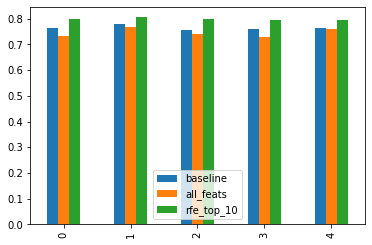

In [48]:
results_df.plot(y=["baseline", "all_feats", "rfe_top_10"], kind="bar")